<div style="background-color:#BFBEBE; text-align: center;">
<img src="imgs/icon.png" style="width:600px">
</div>

# Filtering & Noise Reduction

In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

## Conceituação

* [Decorrelated and Liftered Filter-Bank Energies for Robust Speech Recognition](https://maxwell.ict.griffith.edu.au/spl/publications/papers/euro99_kkp_fbe.pdf)
* [On the Use of Bandpass Liftering in Speech Recognition](https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/260_bandpass%20liftering.pdf)

In [2]:
# frequency is the number of times a wave repeats a second
frequency = 1000
noisy_freq = 50
num_samples = 48000
# The sampling rate of the analog to digital convert 
sampling_rate = 48000.0

In [3]:
#Create the sine wave and noise
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays 
sine_wave = np.array(sine_wave) 
sine_noise = np.array(sine_noise)

In [4]:
# Add them to create a noisy signal
combined_signal = sine_wave + sine_noise

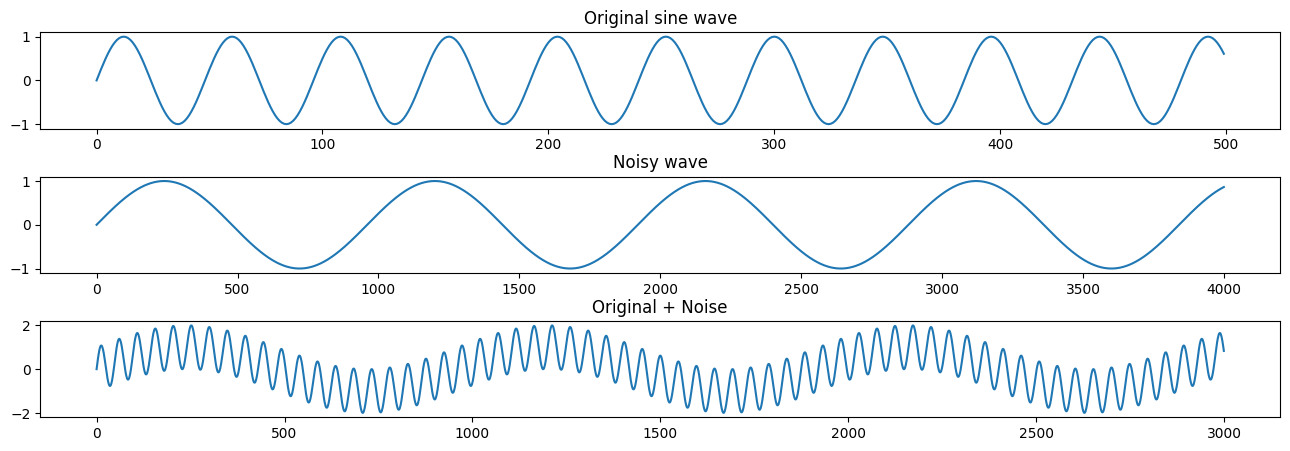

In [5]:
plt.figure(figsize=(16,5))

plt.subplot(3,1,1)
plt.title("Original sine wave")
# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])
plt.show()

In [6]:
ipd.Audio(sine_wave, rate=sampling_rate)

In [7]:
ipd.Audio(sine_noise, rate=sampling_rate)

In [8]:
ipd.Audio(combined_signal, rate=sampling_rate)

In [9]:
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

(0.0, 1200.0)

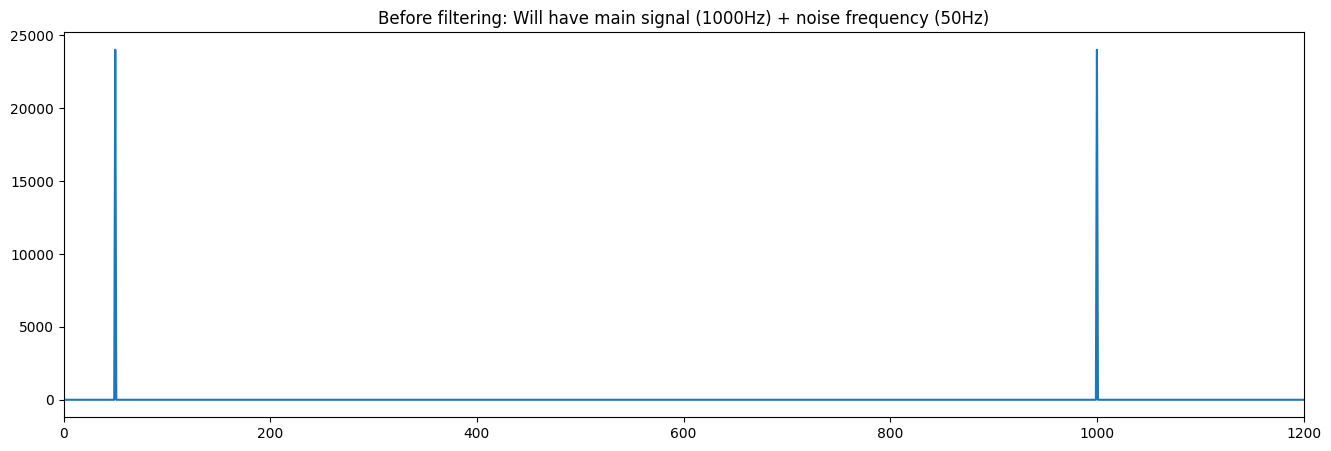

In [10]:
plt.figure(figsize=(16,5))
plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

In [11]:
filtered_freq = []
 
index = 0

In [12]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

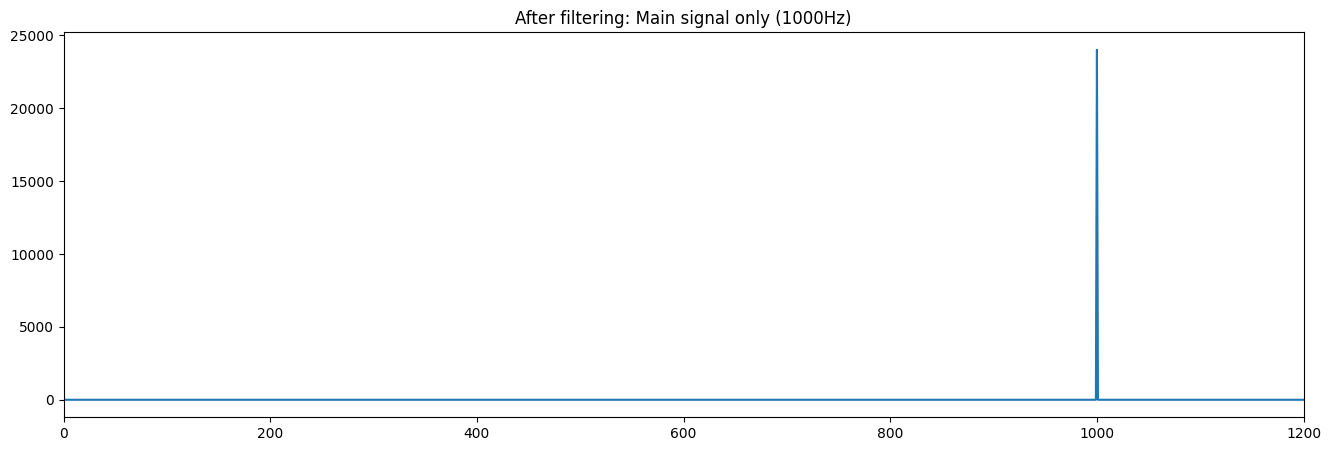

In [13]:
plt.figure(figsize=(16,5))
plt.plot(filtered_freq)
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.show()
plt.close()

In [14]:
recovered_signal = np.fft.ifft(filtered_freq)

/home/vitormeriat/repos/digital-audio-processing/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vitormeriat/repos/digital-audio-processing/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


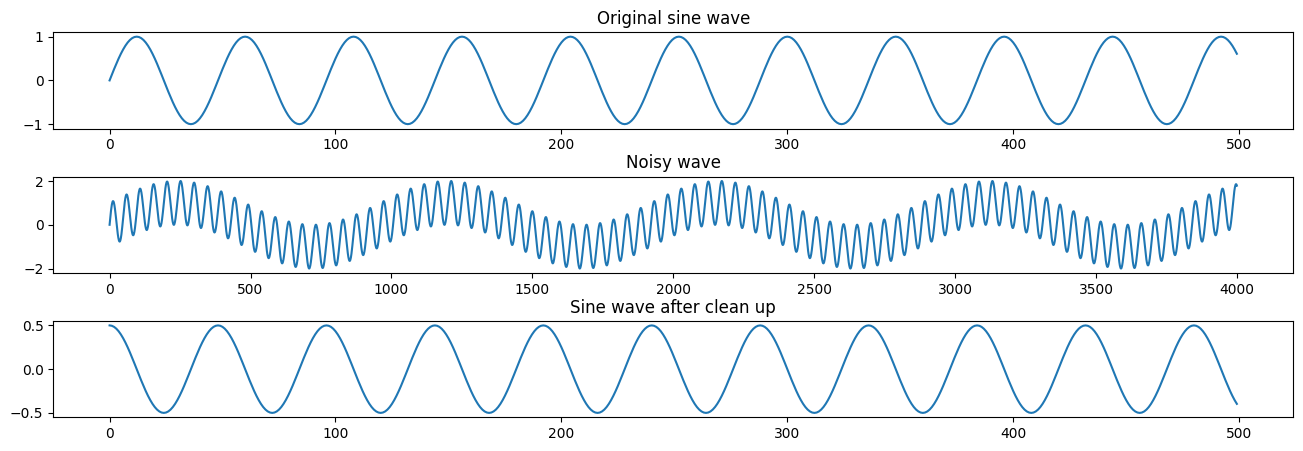

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(3,1,1)
plt.title("Original sine wave")
# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.show()

In [16]:
ipd.Audio(sine_wave, rate=sampling_rate)

In [17]:
ipd.Audio(combined_signal, rate=sampling_rate)

In [18]:
ipd.Audio(recovered_signal, rate=sampling_rate)

/home/vitormeriat/repos/digital-audio-processing/.venv/lib/python3.10/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


# Noise Reduction

Necessário instalar o pacote noisereduce: `pip install noisereduce`

In [20]:
import noisereduce as nr
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [ ]:
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/fish.wav -o audios/fish.wav

In [ ]:
import librosa

In [22]:
data, rate = librosa.load('audios/fish.wav')

In [23]:
ipd.Audio(data, rate=rate)

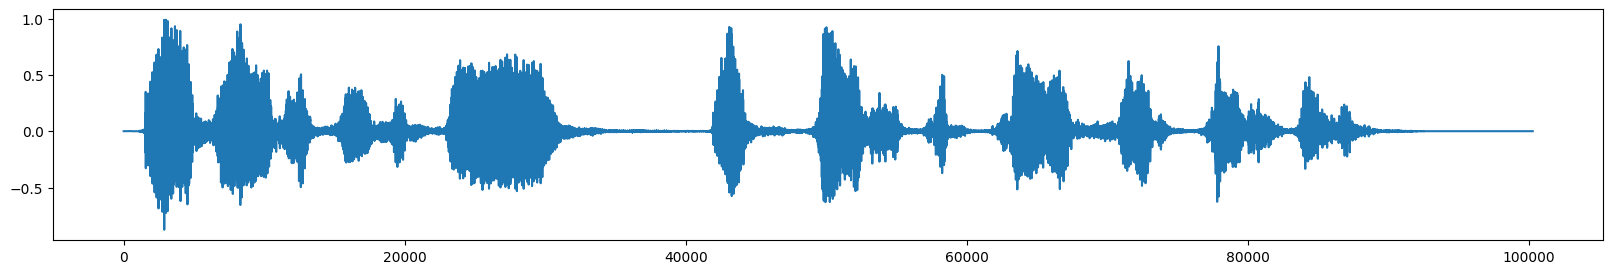

In [34]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)
plt.show()

In [25]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

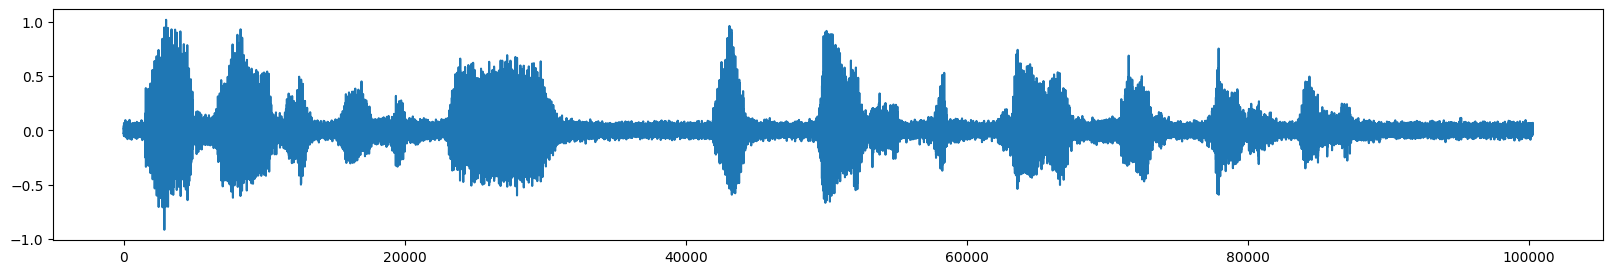

In [26]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)
plt.show()

In [27]:
ipd.Audio(audio_clip_band_limited, rate=rate)

In [31]:
#noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, prop_decrease=1.0, verbose=True)
noise_reduced = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5, stationary=True)

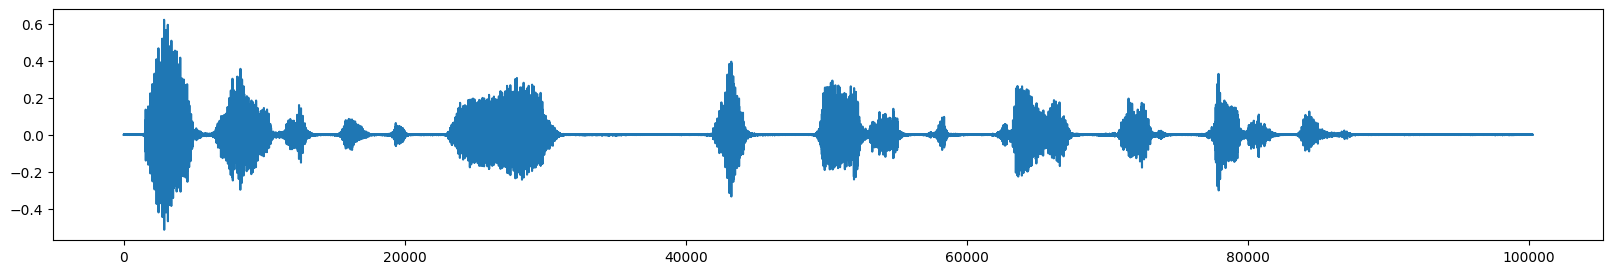

In [32]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)
plt.show()

In [33]:
ipd.Audio(noise_reduced, rate=rate)

### A more difficult example

In [51]:
noise_data, noise_rate = librosa.load('audios/cafe_short.wav')
ipd.Audio(data=noise_data, rate=noise_rate)

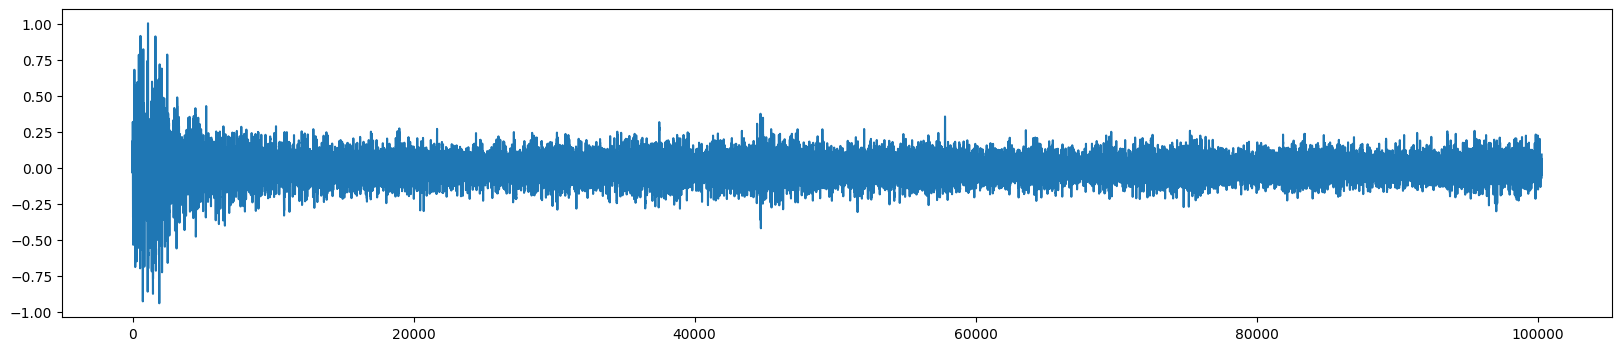

In [52]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)
plt.show()

In [54]:
# add noise to data
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

ipd.Audio(data=audio_clip_cafe, rate=noise_rate)

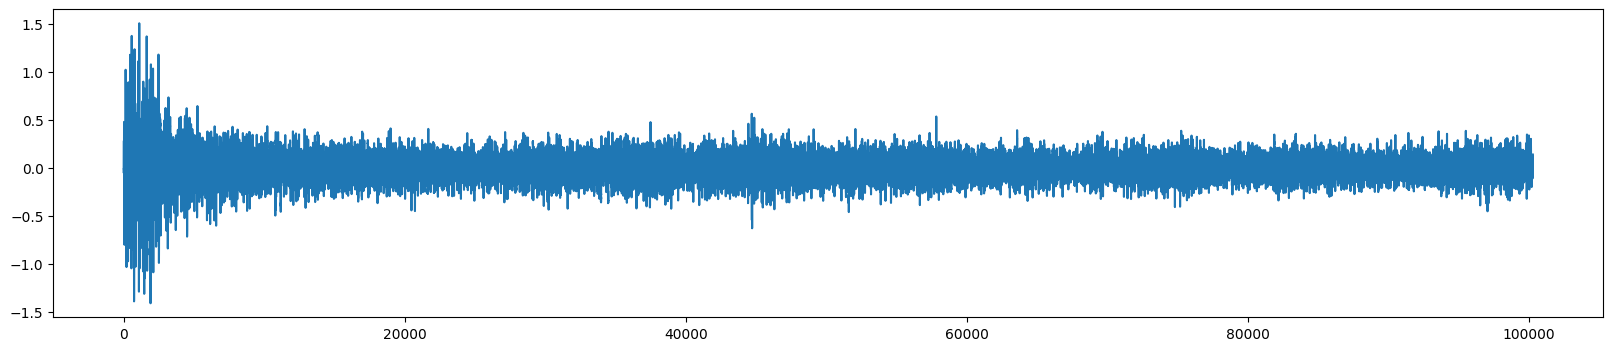

In [55]:
# plot noisy data
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)
plt.show()

In [56]:
# Stationary remove noise
reduced_noise = nr.reduce_noise(y = audio_clip_cafe, sr=rate, y_noise = noise_clip, n_std_thresh_stationary=1.5,stationary=True)

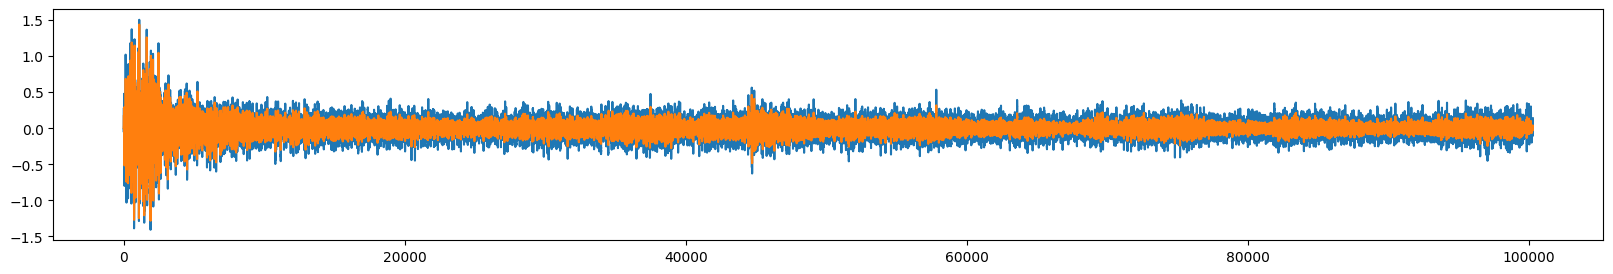

In [57]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(reduced_noise)
plt.show()

In [59]:
ipd.Audio(data=reduced_noise, rate=noise_rate)